In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy as np

In [2]:
path = r"C:\Users\Felicio.Cassalho\Work\Python_Development\ofs_dps\data\skill\1d_pair/"
# out_dir = r"C:\Users\Felicio.Cassalho\Work\Literature\OCSMesh_Paper\Figures\Figure_SUP1/"
out_dir = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\model_runs\2019_07_01_12+120\R07\timeseries_plots/"

In [3]:
files = os.listdir(path)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_7632\2029220573.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path+f, sep='\s+')
C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_7632\2029220573.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 3))


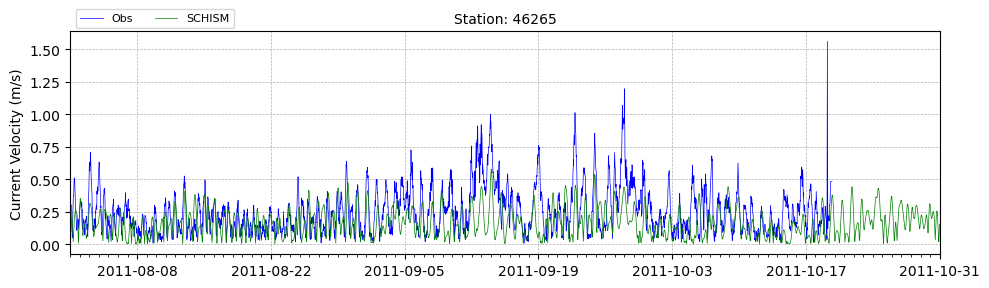

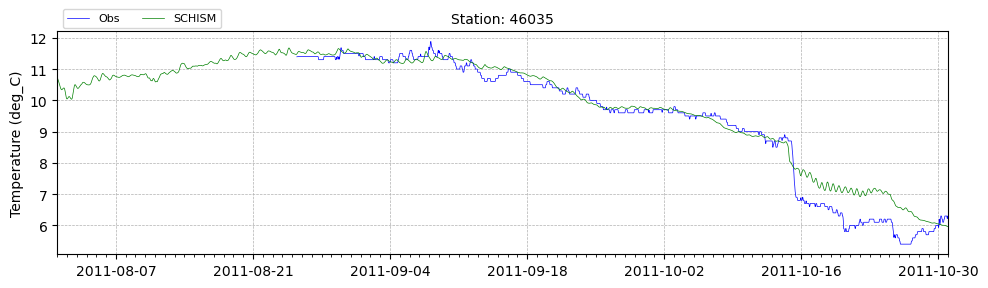

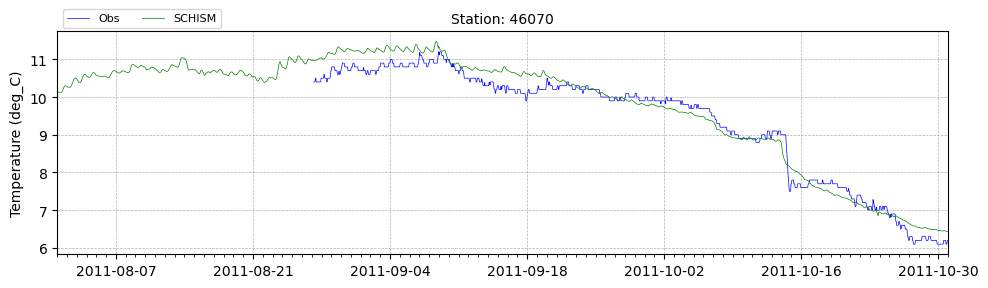

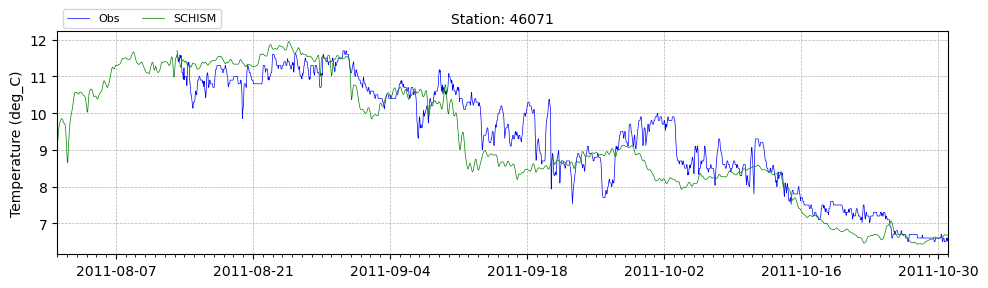

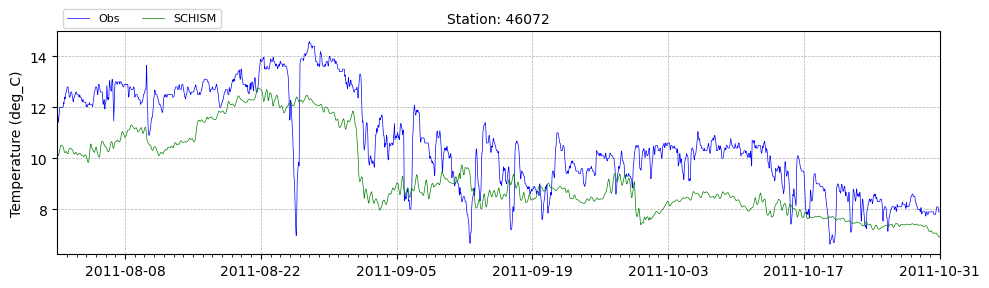

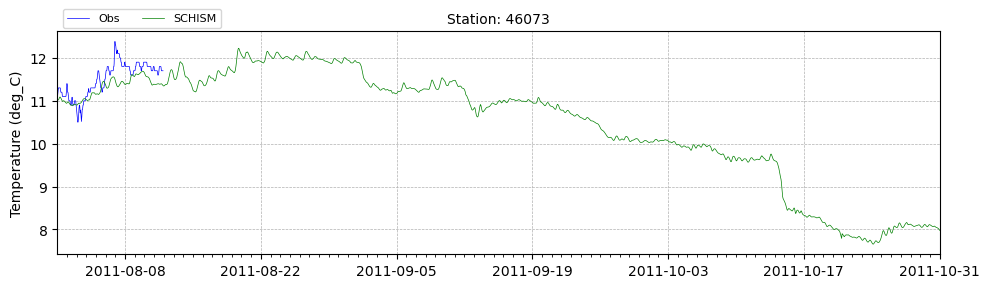

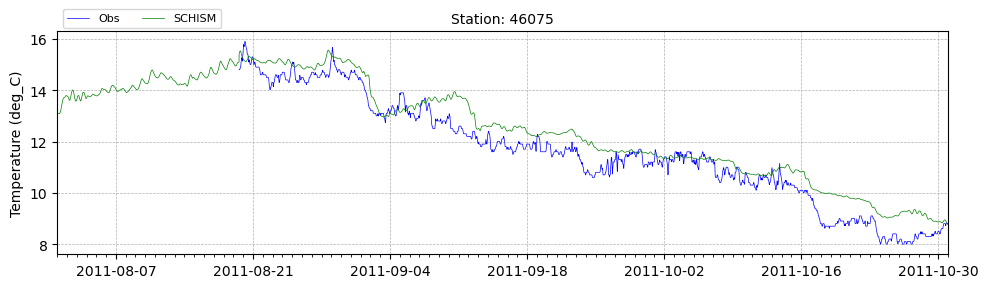

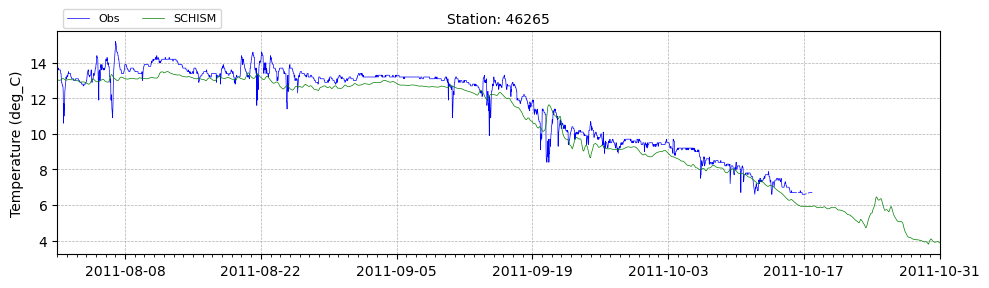

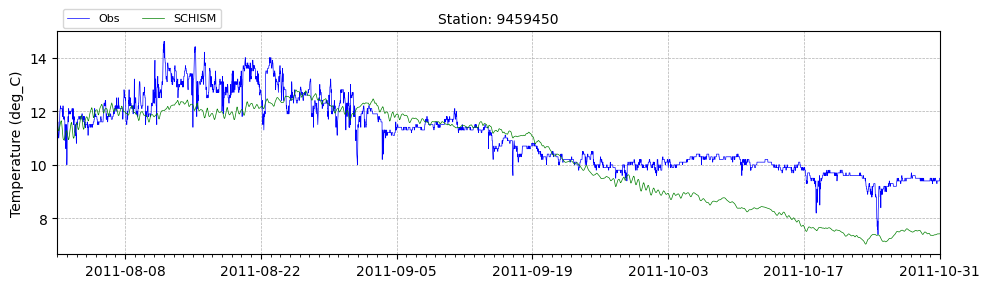

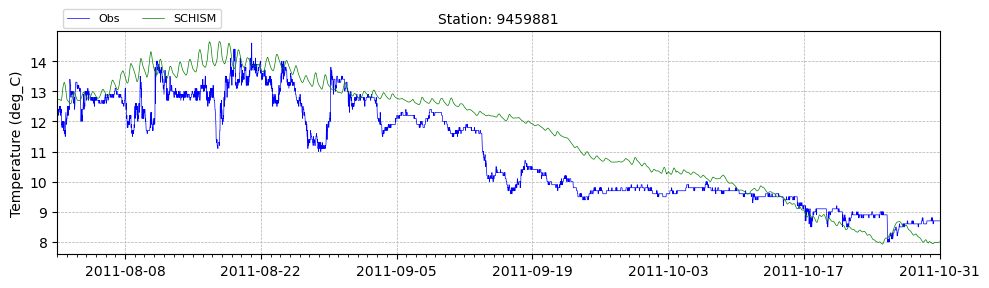

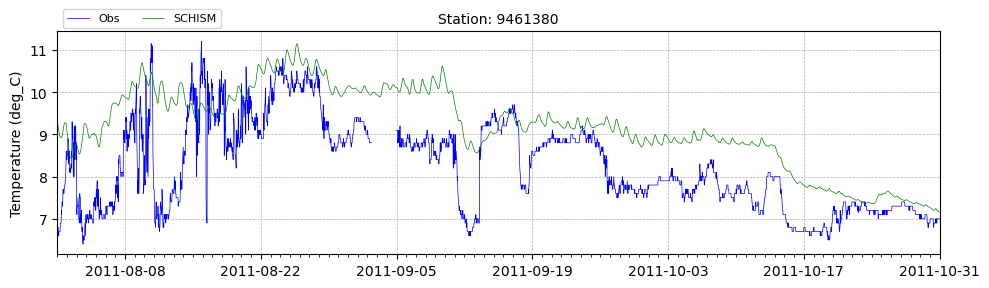

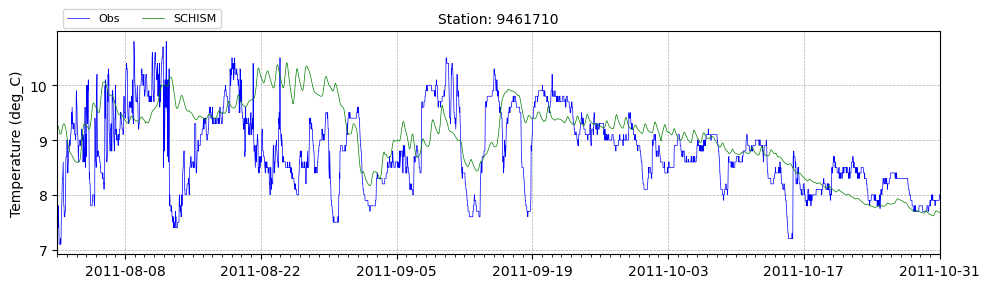

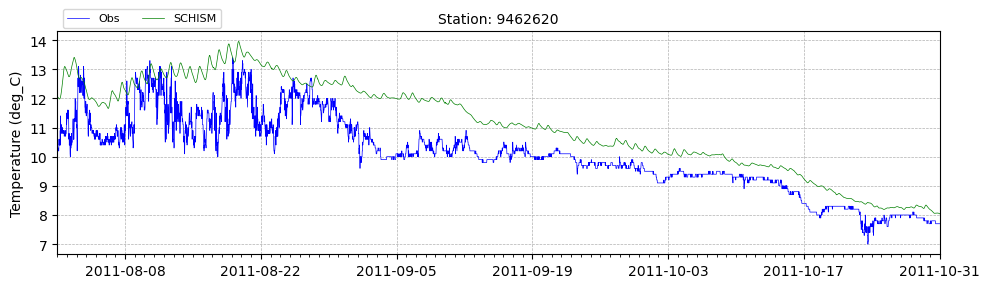

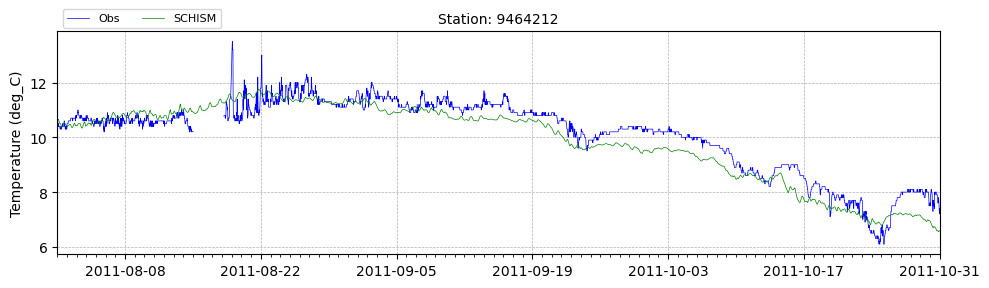

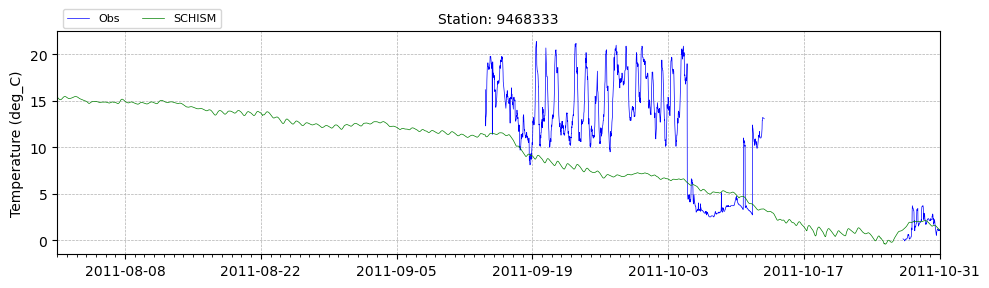

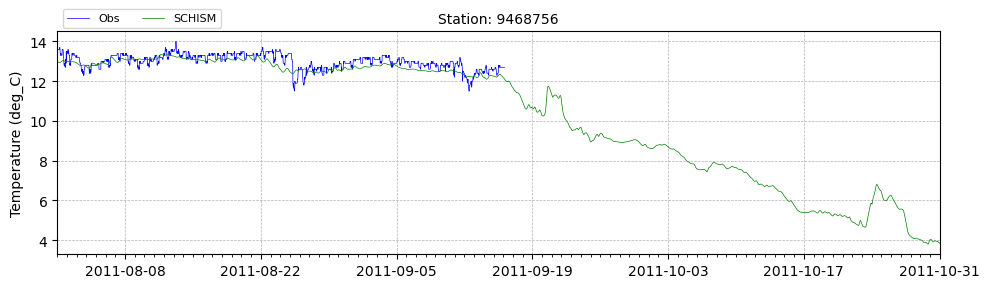

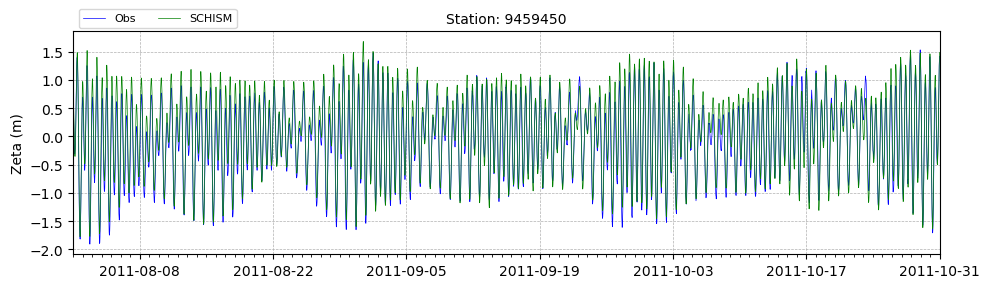

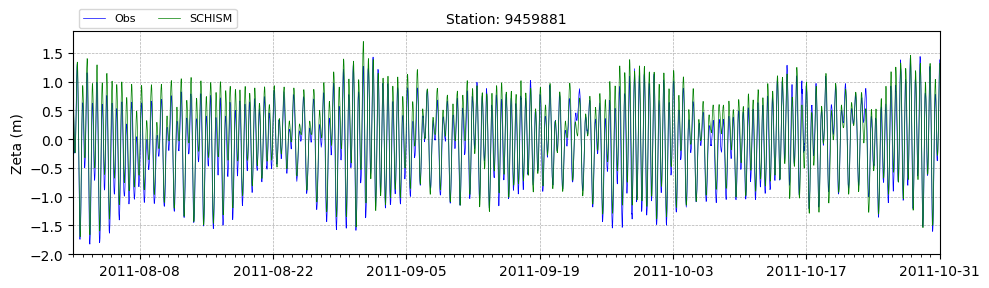

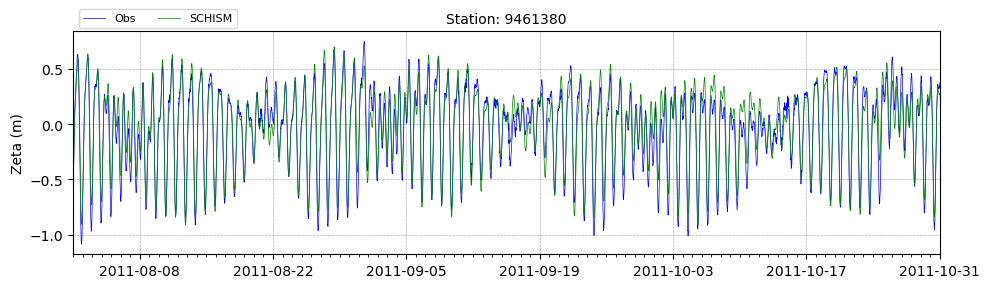

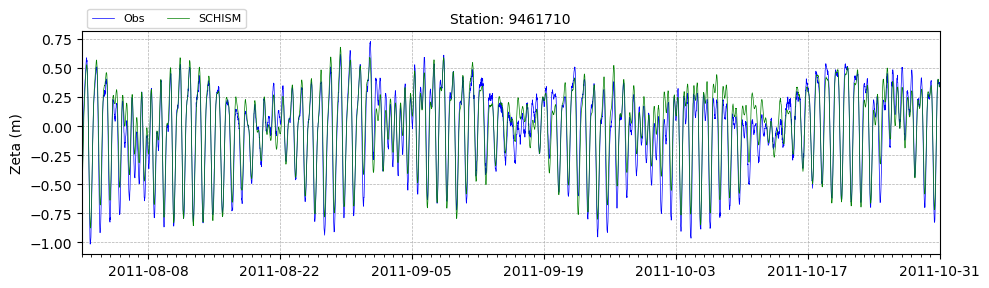

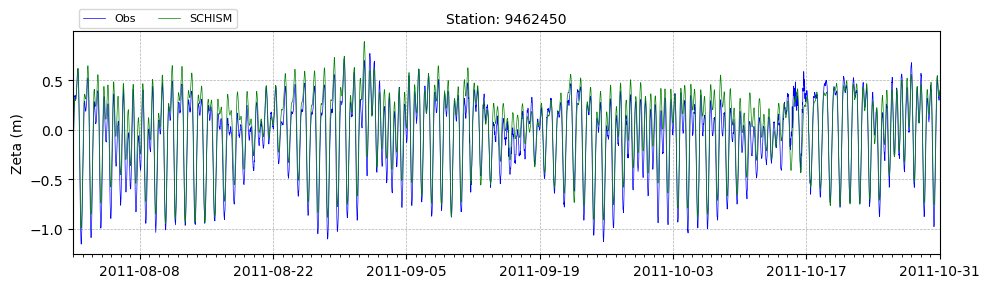

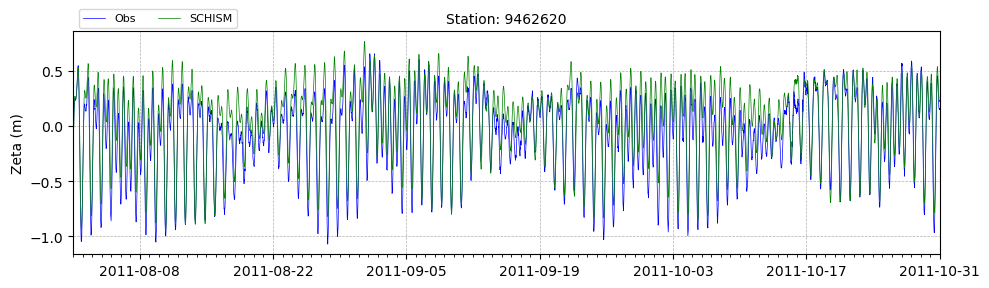

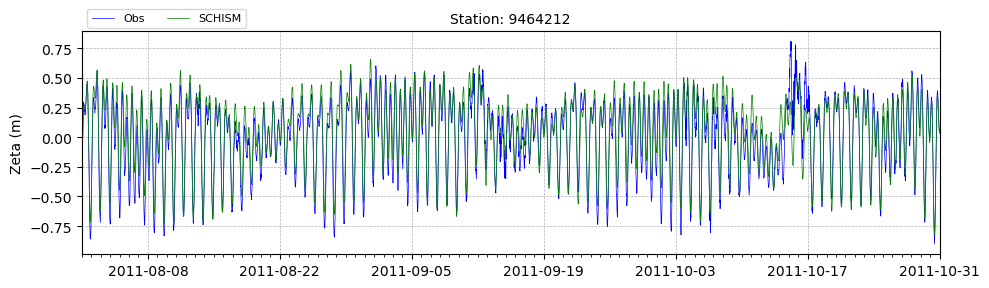

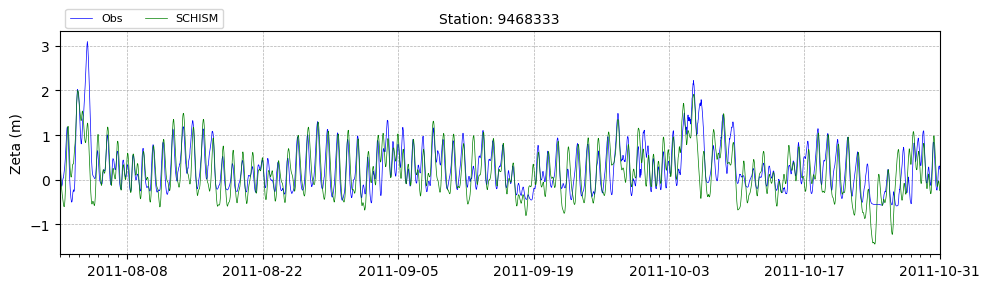

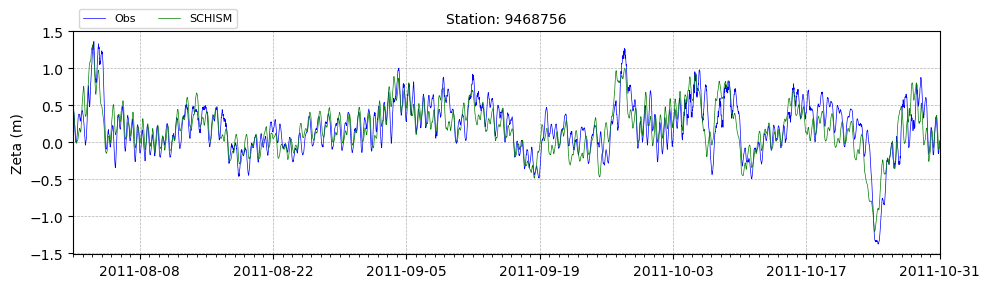

In [16]:
for f in files:
    # try:
    model,var,station=f.split("_")[0+1],f.split("_")[1+1],f.split("_")[2+1]#model,var,station=f.split("_")[0],f.split("_")[1],f.split("_")[2]
    model="SCHISM"

    df = pd.read_csv(path+f, sep='\s+')
    # df['datetime'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']]) + pd.to_timedelta(df['HOUR'], unit='h') + pd.to_timedelta(df['MINUTE'], unit='m')
    df['datetime'] = pd.to_datetime(df['DNUM_JAN1'] + 2459215.5, unit='D', origin='julian')

    if var=="wl":
        ylabel="Zeta (m)"
        c_obs="VAL_OB"
        c_mod="VAL_MODEL"
        df[c_obs] = np.where(df[c_obs] > 30, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < -30, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 30, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < -30, np.nan, df[c_mod])
        
    if var=="temp":
        c_obs="VAL_OB"
        c_mod="VAL_MODEL"
        ylabel="Temperature (deg_C)"
        df[c_obs] = np.where(df[c_obs] > 60, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < -30, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 60, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < -30, np.nan, df[c_mod])
    if var=="salt":
        c_obs="VAL_OB"
        c_mod="VAL_MODEL"
        ylabel="Salinity (PSU)"
        df[c_obs] = np.where(df[c_obs] > 60, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < 0, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 60, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < 0, np.nan, df[c_mod])
    if var=="cu":
        c_obs="SPEED_OB"
        c_mod="SPEED_MODEL"
        ylabel="Current Velocity (m/s)"
        df[c_obs] = np.where(df[c_obs] > 20, np.nan, df[c_obs])
        df[c_obs] = np.where(df[c_obs] < -20, np.nan, df[c_obs])
        df[c_mod] = np.where(df[c_mod] > 20, np.nan, df[c_mod])
        df[c_mod] = np.where(df[c_mod] < -20, np.nan, df[c_mod])
        df['SPEED_OB'] = df['SPEED_OB'].abs()
        
    # Create the plot

    #df = df[~(df == -999).any(axis=1)]
    df = df.replace(-999, np.nan)

    # df = df.dropna()

    if len(df[c_obs].dropna()) < 100 or len(df[c_mod].dropna()) < 100:
        print(f)
        continue

    
    fig, ax = plt.subplots(figsize=(10, 3))
    # Plot multiple lines
    ax.plot(df['datetime'], df[c_obs], label='Obs', color='b',linewidth=0.5)
    ax.plot(df['datetime'], df[c_mod], label=model.upper(),color='g',linewidth=0.5) #linestyle='--'
    # ax.plot(df_ocs_nav.index, df_ocs_nav[station], label='OCSMesh', linestyle='--',color='r')

    # Set x-axis limits
    #ax.set_xlim(pd.Timestamp('2021-08-15 00:00:00'), pd.Timestamp('2021-09-30 00:00:00'))

    # Format the x-axis
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))  # Set major ticks on each day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date labels
    # plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    # plt.axvline(datetime.datetime(2021, 8, 28), linestyle=':', color='k')
    # plt.axvline(datetime.datetime(2021, 8, 30), linestyle=':', color='k')
    # plt.axvline(datetime.datetime(2021, 9, 3), linestyle=':', color='k')
    ax.grid(True,  linestyle='--',linewidth=0.5)
    # plt.text(.7, .94, '+.20m bias corrected', transform=ax.transAxes)


    plt.margins(x=0)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(f'Station: {station}', fontsize=10)
    # plt.legend(ncol=3,loc='upper left')
    plt.legend(ncol=3,bbox_to_anchor=(0.0, 1.125), loc='upper left', fontsize=8)
    plt.tight_layout()
        
    plt.savefig(out_dir+f'{var}_{station}.jpeg', dpi=300)
    # except:
    #     pass

In [67]:
df = pd.read_csv(path+"stofs3d_wl_8774230_station_pair.int", delim_whitespace=True) 

C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_22172\3084912344.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path+"stofs3d_wl_8774230_station_pair.int", delim_whitespace=True)


In [68]:
df['datetime'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']]) + pd.to_timedelta(df['HOUR'], unit='h') + pd.to_timedelta(df['MINUTE'], unit='m')

In [ ]:
if var=="wl":
    ylabel="Zeta (m)"
if var=="temp":
    ylabel="Temperature (deg_C)"
if var=="salt":
    ylabel="Salinity (PSU)"
if var=="cu":
    ylabel="Current Velocity (m/s)"   

In [70]:
model

'stofs3d'

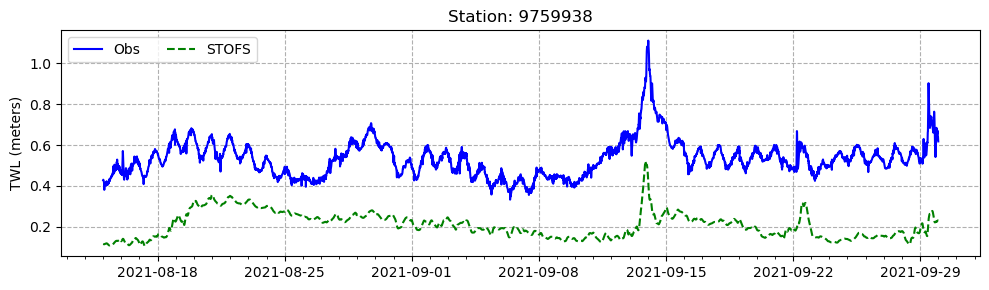

In [69]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 3))

# Plot multiple lines
ax.plot(df['datetime'], df["VAL_OB"], label='Obs', color='b')
ax.plot(df['datetime'], df["VAL_MODEL"], label=model.upper(), linestyle='--',color='g')
# ax.plot(df_ocs_nav.index, df_ocs_nav[station], label='OCSMesh', linestyle='--',color='r')

# Set x-axis limits
# ax.set_xlim(pd.to_datetime(start_str), pd.to_datetime(end_str))

# Format the x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks on each day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date labels
# plt.xticks(rotation=45)  # Rotate x-axis labels for readability
# plt.axvline(datetime.datetime(2021, 8, 28), linestyle=':', color='k')
# plt.axvline(datetime.datetime(2021, 8, 30), linestyle=':', color='k')
# plt.axvline(datetime.datetime(2021, 9, 3), linestyle=':', color='k')

ax.grid(True,  linestyle='--')

# plt.text(.7, .94, '+.20m bias corrected', transform=ax.transAxes)

plt.ylabel(ylabel)
plt.title(f'Station: {station}')
plt.legend(ncol=3,loc='upper left')
plt.tight_layout()


# plt.savefig(r'C:\Users\Felicio.Cassalho\Work\Modeling\OCSMesh_Paper\MeshGen_Pearl\Figures/'+f'{station}.jpeg',dpi=500)

# plt.show()